# Exploring data

In [84]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import glob as glob
import matplotlib.pyplot as plt

from sklearn.datasets import samples_generator as sg
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

In [14]:
filenames = glob.glob('../data/Raw/*.csv')

In [5]:
jnk = pd.read_csv('../data/Raw/Jnk.csv', sep = ';')

In [6]:
jnk.head()

,CauseGene,EffectGene,Replicate,Treatment,Pvalue,0min_neg_cause,15min_cause,30min_cause,90min_cause,120min_cause,...,360min_cause,0min_neg_effect,15min_effect,30min_effect,90min_effect,120min_effect,180min_effect,210min_effect,240min_effect,360min_effect
0,MAPK10,A1BG,1,BCR,0.333,0.280284,0.372051,0.824172,-0.746940,0.472452,...,-1.508746,0.077473,-0.044090,-0.349988,-0.122733,-0.027860,1.066276,0.106499,-1.334779,0.580358
1,MAPK10,A1BG,1,CD40,0.333,0.280284,0.671412,0.779907,-0.366185,1.063347,...,-0.902298,0.077473,0.255573,0.825101,-2.091418,0.986115,0.020539,0.666451,-0.667305,0.313519
2,MAPK10,A1BG,2,BCR,0.333,0.961877,-0.165013,0.312029,1.250839,1.127154,...,-0.409536,-0.670996,0.537398,0.592462,0.456636,-0.244272,-1.993159,0.945375,0.301992,1.030175
3,MAPK10,A1BG,2,CD40,0.333,0.961877,0.449106,0.607056,-0.655400,0.438219,...,-1.283292,-0.670996,1.808573,-1.767904,-0.623801,-0.330098,1.473550,-0.284614,-1.346430,0.232617
4,MAPK10,A1BG,3,BCR,0.333,0.192576,-2.127241,0.919851,0.559836,0.263217,...,-2.190987,1.650800,0.196474,-0.110119,-1.663191,0.131282,-0.023995,-0.201010,1.363202,1.410923


In [7]:
jnk.describe()

,Replicate,Pvalue,0min_neg_cause,15min_cause,30min_cause,90min_cause,120min_cause,180min_cause,210min_cause,240min_cause,360min_cause,0min_neg_effect,15min_effect,30min_effect,90min_effect,120min_effect,180min_effect,210min_effect,240min_effect,360min_effect
count,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000,300438.000000
mean,2.000000,0.626692,-0.601038,-0.407198,0.407461,-0.296367,0.502647,0.269170,-0.327822,0.167640,-0.049654,-0.010104,0.048604,0.031054,-0.050262,-0.056626,-0.085797,0.013403,-0.023786,0.058731
std,0.816498,0.306825,1.033680,1.120821,0.697801,0.815511,0.686595,0.587064,1.038683,0.646049,1.029106,0.928220,1.155254,0.744933,1.004501,0.889811,0.848212,1.048609,1.076631,1.060814
min,1.000000,0.000000,-2.631707,-2.543696,-1.335505,-1.955696,-1.441579,-1.274366,-3.209102,-0.863610,-2.190987,-3.503078,-5.929185,-3.459456,-5.000662,-3.744604,-3.714958,-4.662230,-4.882397,-4.246056
25%,1.000000,0.395000,-1.159572,-1.211629,0.012916,-0.873302,0.274701,0.119731,-0.762814,-0.564831,-0.902298,-0.638302,-0.710063,-0.470031,-0.699634,-0.650075,-0.665318,-0.586267,-0.685528,-0.624116
50%,2.000000,0.708000,-0.478551,-0.383387,0.486017,-0.338879,0.484302,0.515033,0.086155,0.332097,0.129951,-0.010876,-0.013368,0.039907,-0.069593,-0.048745,-0.094251,0.026663,-0.013353,0.062201
75%,3.000000,0.901000,0.192576,0.615612,0.779907,0.559836,1.026100,0.639836,0.347268,0.719931,0.725785,0.618415,0.713972,0.550994,0.576469,0.537341,0.488391,0.642192,0.676552,0.762480
max,3.000000,1.000000,0.961877,1.407778,2.204756,1.250839,1.579575,1.029752,0.937734,1.060185,1.571902,3.722801,5.558763,3.636107,4.744695,4.119485,3.755805,5.130988,4.466281,4.002814


In [10]:
jnk = jnk[jnk['Pvalue']<0.05]

In [11]:
jnk.describe()

,Replicate,Pvalue,0min_neg_cause,15min_cause,30min_cause,90min_cause,120min_cause,180min_cause,210min_cause,240min_cause,360min_cause,0min_neg_effect,15min_effect,30min_effect,90min_effect,120min_effect,180min_effect,210min_effect,240min_effect,360min_effect
count,17352.00000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000,17352.000000
mean,2.00000,0.018808,-0.601038,-0.407198,0.407461,-0.296367,0.502647,0.269170,-0.327822,0.167640,-0.049654,-0.002210,-0.024858,0.166680,-0.174200,0.004068,-0.070316,-0.113851,-0.124755,0.091156
std,0.81652,0.015853,1.033708,1.120851,0.697820,0.815534,0.686614,0.587080,1.038711,0.646066,1.029134,0.890813,1.153890,0.667830,0.914903,0.849925,0.819210,1.057324,1.080449,1.163270
min,1.00000,0.000000,-2.631707,-2.543696,-1.335505,-1.955696,-1.441579,-1.274366,-3.209102,-0.863610,-2.190987,-2.680771,-4.354142,-2.332041,-4.030996,-3.614005,-2.850077,-4.568499,-4.678770,-3.829776
25%,1.00000,0.003000,-1.159572,-1.211629,0.012916,-0.873302,0.274701,0.119731,-0.762814,-0.564831,-0.902298,-0.627184,-0.795909,-0.301882,-0.747983,-0.567201,-0.631714,-0.686014,-0.824872,-0.677076
50%,2.00000,0.016000,-0.478551,-0.383387,0.486017,-0.338879,0.484302,0.515033,0.086155,0.332097,0.129951,0.045217,-0.036840,0.191630,-0.132039,0.027444,-0.058329,-0.023408,-0.107459,0.132556
75%,3.00000,0.032000,0.192576,0.615612,0.779907,0.559836,1.026100,0.639836,0.347268,0.719931,0.725785,0.651080,0.651294,0.652445,0.425285,0.595945,0.499994,0.585632,0.599559,0.906878
max,3.00000,0.049000,0.961877,1.407778,2.204756,1.250839,1.579575,1.029752,0.937734,1.060185,1.571902,2.768114,4.830095,2.635608,3.152570,3.669921,2.567011,3.331574,3.762194,3.507158


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f793e8f57b8>]], dtype=object)

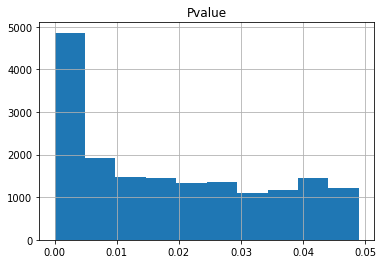

In [13]:
jnk.hist(column='Pvalue')

In [15]:
dataframes = list()
for fn in filenames:
    df = pd.read_csv(fn, sep=';')
    df = df[df['Pvalue']<=0.05]
    dataframes.append(df)
positive_dataframe = pd.concat(dataframes)

In [16]:
positive_dataframe.describe()

,Replicate,Pvalue,0min_neg_cause,15min_cause,30min_cause,90min_cause,120min_cause,180min_cause,210min_cause,240min_cause,360min_cause,0min_neg_effect,15min_effect,30min_effect,90min_effect,120min_effect,180min_effect,210min_effect,240min_effect,360min_effect
count,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000,47310.000000
mean,2.000000,0.019645,-0.253771,-0.202387,0.237065,-0.030130,0.309775,0.245870,-0.047036,-0.043730,-0.338348,-0.019392,-0.053014,0.132500,-0.165013,-0.018789,-0.046205,-0.051292,-0.062585,0.093309
std,0.816505,0.015716,1.011777,1.057047,0.834457,0.772179,0.676408,0.838084,1.169437,1.142481,1.091722,0.886477,1.128808,0.681705,0.926512,0.856733,0.828177,1.056030,1.108952,1.162122
min,1.000000,0.000000,-2.631707,-3.544150,-1.335505,-1.955696,-2.063257,-1.816556,-3.209102,-4.137415,-3.052723,-3.039448,-5.929185,-2.904567,-4.717788,-3.614005,-3.362663,-4.568499,-4.758669,-3.942327
25%,1.000000,0.005000,-1.036627,-0.995702,-0.754216,-0.655400,0.124721,0.004234,-0.767711,-0.772534,-1.301564,-0.634648,-0.794210,-0.352894,-0.744085,-0.590349,-0.621823,-0.625828,-0.774407,-0.670456
50%,2.000000,0.018000,-0.037189,0.157753,0.588019,0.048357,0.428794,0.440224,0.204090,0.311223,-0.245521,0.014760,-0.070988,0.149291,-0.138684,-0.002650,-0.042009,0.025042,-0.044802,0.132647
75%,3.000000,0.033000,0.777138,0.621560,0.896329,0.559836,0.766409,0.645177,0.793997,0.719931,0.455181,0.611621,0.614262,0.628252,0.429909,0.566513,0.537708,0.650343,0.690229,0.910642
max,3.000000,0.050000,1.570461,1.559381,2.204756,2.682876,1.579575,1.806298,1.759773,2.643628,2.737891,3.111687,5.319324,2.635608,3.846770,3.887316,3.636223,4.085083,4.010764,3.884514


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f793ddb5f98>]], dtype=object)

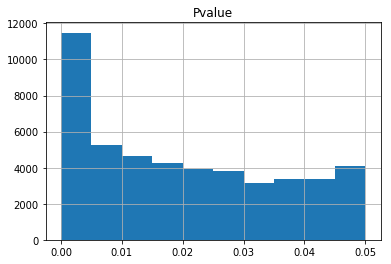

In [17]:
positive_dataframe.hist(column='Pvalue')

In [97]:
sample = positive_dataframe.sample(frac=0.01, replace=True)

In [98]:
len(sample.columns)

23

In [124]:
sample.columns

Index(['0min_neg_cause', '15min_cause', '30min_cause', '90min_cause',
       '120min_cause', '180min_cause', '210min_cause', '240min_cause',
       '360min_cause'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f792f2083c8>]], dtype=object)

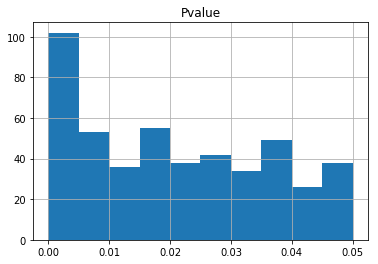

In [100]:
sample.hist(column='Pvalue')

In [90]:
scaler = MinMaxScaler()
scaler.fit(sample.iloc[:,5:])
plotdata = scaler.transform(sample.iloc[:,5:])*2-1

array([[ 0.47903493,  1.        ,  0.28107941, ...,  0.63333433,
        -0.03077271,  0.4934333 ],
       [ 0.38594683,  0.53470284,  0.22006669, ...,  0.30596889,
        -0.06905322,  0.09273346],
       [ 0.64293541,  0.58964007,  0.2755156 , ..., -0.2834054 ,
         0.31081024,  0.31628054],
       ..., 
       [ 0.64033105, -0.18082868,  0.14441202, ...,  0.0024543 ,
         0.48384636, -0.08729654],
       [ 0.34420293, -0.44473378,  0.27411841, ..., -0.06728404,
         0.25874545,  0.20158834],
       [-1.        , -0.32789309,  0.05464167, ...,  0.29913875,
         0.52965546,  0.26806417]])

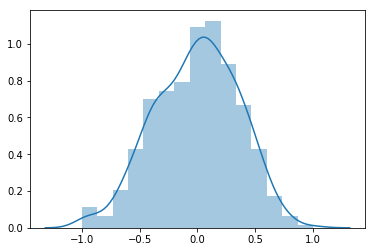

In [118]:
sns.distplot(plotdata[:,17])

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


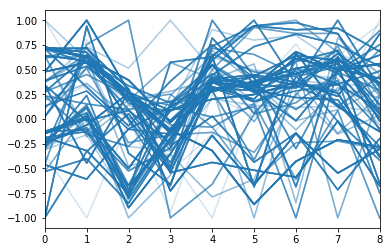

In [125]:
sns.tsplot(data=plotdata[:,0:9],err_style="unit_traces")

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


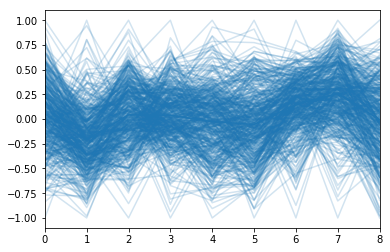

In [126]:
sns.tsplot(data=plotdata[:,9:],err_style="unit_traces")

In [136]:
sample.columns

Index(['CauseGene', 'EffectGene', 'Replicate', 'Treatment', 'Pvalue',
       '0min_neg_cause', '15min_cause', '30min_cause', '90min_cause',
       '120min_cause', '180min_cause', '210min_cause', '240min_cause',
       '360min_cause', '0min_neg_effect', '15min_effect', '30min_effect',
       '90min_effect', '120min_effect', '180min_effect', '210min_effect',
       '240min_effect', '360min_effect'],
      dtype='object')

In [127]:
scaler = MinMaxScaler()

In [130]:
trajectories = pd.DataFrame()

In [131]:
trajectories['0min'] = list(zip(sample['0min_neg_cause'], sample['0min_neg_effect']))

In [134]:
trajectories['15min'] = list(zip(sample['15min_cause'], sample['15min_effect']))

In [135]:
trajectories['30min'] = list(zip(sample['30min_cause'], sample['30min_effect']))

In [137]:
trajectories['90min'] = list(zip(sample['90min_cause'], sample['90min_effect']))

In [138]:
trajectories['120min'] = list(zip(sample['120min_cause'], sample['120min_effect']))

In [139]:
trajectories['180min'] = list(zip(sample['180min_cause'], sample['180min_effect']))

In [140]:
trajectories['210min'] = list(zip(sample['210min_cause'], sample['210min_effect']))

In [141]:
trajectories['240min'] = list(zip(sample['240min_cause'], sample['240min_effect']))

In [142]:
trajectories['360min'] = list(zip(sample['360min_cause'], sample['360min_effect']))

In [143]:
trajectories

,0min,15min,30min,90min,120min,180min,210min,240min,360min
0,"(-0.920032125, -0.693916824)","(-1.316488512, -1.418554942)","(-0.880604045, -0.485387475)","(1.696180009, 0.34395343)","(0.905203844, 0.845062133)","(1.625928042, 0.036842732)","(0.152191689, -1.535549126)","(1.840855924, 1.117807696)","(0.165540933, 2.987268735)"
1,"(0.280283912, 0.087336304)","(0.67141161, 0.011909217)","(0.779907394, -0.25276597)","(-0.366184507, -0.974822778)","(1.063346847, 0.156002613)","(1.029751843, -0.160249463)","(0.396523514, 0.286244311)","(0.942514646, 0.142439465)","(-0.902297943, 1.46526621)"
2,"(0.997379552, -0.159898611)","(0.619799545, -0.422942302)","(0.914211556, -0.407462183)","(0.105569073, -0.837100818)","(-0.824307977, -1.247190518)","(-1.580801869, -1.565767116)","(-1.787551241, 0.359303294)","(-1.774295184, 1.168530765)","(-1.30156389, 0.110183324)"
3,"(0.280283912, 0.633421029)","(0.67141161, -1.250145119)","(0.779907394, -0.774196683)","(-0.366184507, -0.547777639)","(1.063346847, 0.866650626)","(1.029751843, 0.572965963)","(0.396523514, 0.818871372)","(0.942514646, 0.74588418)","(-0.902297943, 1.224079813)"
4,"(-1.036627384, 0.147278908)","(-1.146783276, -1.056344189)","(0.89632946, 0.462853043)","(0.039460586, 0.24766523)","(0.919628517, 0.968806218)","(-1.274366166, -1.145267317)","(0.937734108, -0.044486302)","(-0.773467011, -1.099839547)","(-0.91903252, 0.753328203)"
5,"(-0.920032125, 0.904486315)","(-1.316488512, 0.537710839)","(-0.880604045, 0.48998663)","(1.696180009, -2.13099078)","(0.905203844, -0.49474763)","(1.625928042, -1.668476944)","(0.152191689, -0.837746653)","(1.840855924, -1.501614243)","(0.165540933, -2.147521714)"
6,"(0.972582491, 0.499832879)","(0.593413953, -0.170951108)","(1.133286252, 0.104427083)","(0.281295605, -0.460397835)","(0.421583212, -1.192988837)","(0.480410631, -1.537026873)","(0.968890505, -0.216255652)","(0.311222914, -0.754092784)","(0.758951513, -1.449990709)"
7,"(-1.010776427, -0.231209567)","(-0.630475804, -0.823912991)","(-0.754215897, -0.252821037)","(0.695658709, 0.36533802)","(0.280316894, 2.404084225)","(0.513840233, -0.092490258)","(-0.484056487, -1.936368482)","(0.026633274, -0.077538128)","(-2.433424061, 0.92010382)"
8,"(0.475869836, -1.630684381)","(0.466137285, -1.42385867)","(0.895240588, -1.028547498)","(0.329186493, -1.371568895)","(0.428793765, -0.471363672)","(0.440224224, 0.277266874)","(0.793997156, 0.176505792)","(0.374025996, 0.731356779)","(0.391500376, -0.559611193)"
9,"(0.475869836, -0.182600323)","(0.466137285, 0.329584512)","(0.895240588, 0.409302281)","(0.329186493, -0.323958304)","(0.428793765, -0.786382507)","(0.440224224, 1.185738571)","(0.793997156, 1.73667601)","(0.374025996, 1.698498034)","(0.391500376, 1.291939771)"


In [146]:
trajectories.to_csv('../data/Raw/sample.csv')

In [151]:
!pip install plotly

In [153]:
import plotly.plotly as py
import plotly.graph_objs as go

In [154]:
plotlysamples = pd.read_csv('../data/Raw/plotsamples.csv', sep = ',')

In [157]:
plotlysamples.head()

,x,y,z
0,0.127389,0.181818,0.000000
1,0.000000,0.022727,0.041667
2,0.159236,0.250000,0.083333
3,0.955414,0.409091,0.250000
4,0.700637,0.522727,0.333333


In [166]:
x = pd.Series(plotlysamples['x'])
y = pd.Series(plotlysamples['y'])
z = pd.Series(plotlysamples['z'])

In [167]:
trace = go.Scatter3d(
    x=x, y=y, z=z,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

data = [trace]

In [ ]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Sample trajectories',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

fig = dict(data = data, layout=layout)

py.iplot(fig, filename='sampleplot', height=700, validate=False)

## Generating data

In [173]:
import random

In [227]:
base = np.array([0.25,0.25,0.25,0.75,0.75,0.25,0.25])

In [228]:
base + random.uniform(0,1)

array([ 0.71836685,  0.71836685,  0.71836685,  1.21836685,  1.21836685,
        0.71836685,  0.71836685])

In [229]:
base_list = list()
for i in range (0,100):
    base_list.append(np.random.uniform(0,1,len(base)))
    
for i in range (0,100):
    base_list.append(base)

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



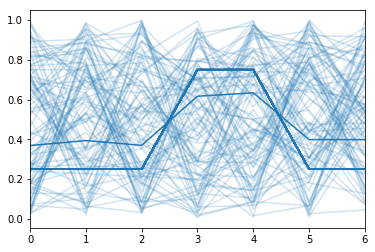

In [230]:
sns.tsplot(data=np.array(base_list), err_style='unit_traces')

In [210]:
!ls

1.0 Exploring Raw Data.ipynb
1.0 Labeling.ipynb
1.1 Batching Files.ipynb
1.2 TrainTest.ipynb
2.0 Test_Clustering_IRF4.ipynb
2.1 DC Clustering.ipynb
2.1 DI Clustering.ipynb
2.1 TT Clustering.ipynb
3.0 DI Sklearn SpectralCoclustering.ipynb
3.1 Bisecting Time Series.ipynb
3.1 CC Biclustering (Cheng & Church).ipynb
3.1 Discriminative Biclustering (Odibat & Reddy, 2014) .ipynb
3.1 Measures test.ipynb
3.1 RAPOOC Test.ipynb
3.1 STSBiclustering.ipynb
3.1 STSSCAN.ipynb
3.1 TS-RAPOOC.ipynb
clusterer.py
DC Batch Clustering.ipynb
metrics.py
__pycache__
TestData
Test DBSCAN.ipynb


In [212]:
high_coherence = np.array(pd.read_csv('TestData/SimulatedDataCoherence/HighCoherence.csv'))

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



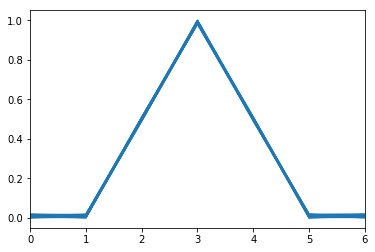

In [213]:
sns.tsplot(data=high_coherence, err_style="unit_traces")

In [214]:
low_coherence = np.array(pd.read_csv('TestData/SimulatedDataCoherence/LowCoherence.csv'))

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



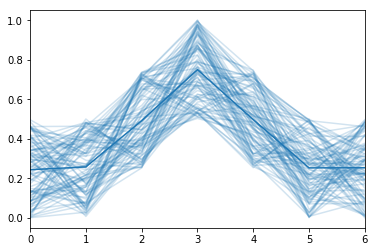

In [215]:
sns.tsplot(data=low_coherence, err_style="unit_traces")

In [217]:
rand_data = np.array(pd.read_csv('TestData/SimulatedDataCoherence/RandData.csv'))

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



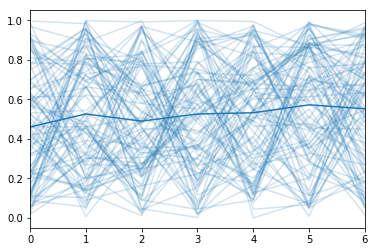

In [218]:
sns.tsplot(data=rand_data, err_style="unit_traces")